In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

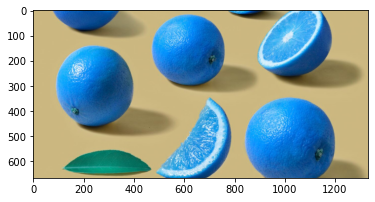

In [2]:
img = "inputs/or1.jpg"
image = cv2.imread(img)
plt.imshow(image)

In [3]:
import pixellib

In [4]:
from pixellib.instance import instance_segmentation

D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [5]:
segment = instance_segmentation()
segment.load_model("mask_rcnn_coco.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [6]:
target_classes = segment.select_target_classes(orange=True)

In [7]:
r, output = segment.segmentImage(img, segment_target_classes=target_classes, extract_segmented_objects=True,
                           save_extracted_objects=True, show_bboxes=True,  output_image_name="output.jpg")

Processed image saved successfully in your current working directory.


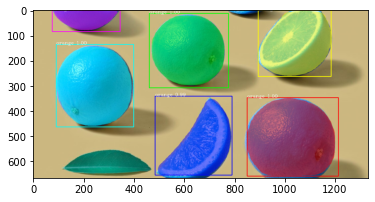

In [8]:
plt.imshow(output)

In [9]:
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks', 'extracted_objects'])

In [10]:
No_of_detected_oranges = len(r['extracted_objects'])
No_of_detected_oranges

6

Segmentic Images: 


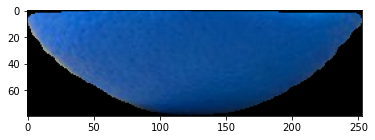

In [11]:
if(No_of_detected_oranges>1):
    print("Segmentic Images: ")
    for i in range(No_of_detected_oranges):
        plt.imshow(r['extracted_objects'][i])

In [12]:
tot_pix = []
for i in range(No_of_detected_oranges):
    mask = r['extracted_objects'][i]
    black = np.sum(mask==(0,0,0))
    tot = mask.size
    masked = tot-black
    if(masked<image.size/2):
        tot_pix.append(masked)

In [13]:
tot_pix

[186763, 170325, 257431, 219652, 149886, 42852]

In [14]:
oranges_pixel = 0
for i in tot_pix:
        oranges_pixel = oranges_pixel + i

In [15]:
oranges_pixel

1026909

In [16]:
total_pixel = image.size
total_pixel

2661336

In [17]:
percentage_of_oranges_color = (oranges_pixel/total_pixel)*100
percentage_of_oranges_color

38.58622135649163

Final Output

In [18]:
print("Detected Oranges : {} \nPercentage of the Orange's Color : {}"
      .format(No_of_detected_oranges,percentage_of_oranges_color))

Detected Oranges : 6 
Percentage of the Orange's Color : 38.58622135649163
